## 2. Finding Spikes!

### Note

This section primairly focuses using IPFX to analyze your patch clamp data. In particular focuses on analyzing current clamp data. However you may find success with other analysis packages such as [https://github.com/BlueBrain/BluePyEfe](https://github.com/BlueBrain/BluePyEfe)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyabf
import ipfx
from IPython.display import display, HTML

C:\Users\SMest\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SMest\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\SMest\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\SMest\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SMest\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SMest\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will b

In [2]:
abf = pyabf.ABF("data/example1.abf") #this tells pyabf to load our data and store it in an abf object
abf.setSweep(7)

### Setting up our spike finder

To begin with, we will import just the spike finder from IPFX.

In [3]:
from ipfx.feature_extractor import SpikeFeatureExtractor

Now we will create our SpikeFeatureExtractor. To do so, we will create a object similar to our ABF object. We can pass our settings to the object, that way we will not have to specify the settings repeatedly. More on this later

In [4]:
spike_fe = SpikeFeatureExtractor(filter=0) #Set the filter to 0

The above command intializes the spike feature extractor. Similar to the abf object, this has many attributes we can access.

In [5]:
dir(spike_fe)[-10:]

['max_interval',
 'min_height',
 'min_peak',
 'process',
 'reject_at_stim_start_interval',
 'spike_feature',
 'spike_feature_keys',
 'spikes',
 'start',
 'thresh_frac']

### Getting the Spikes

To begin, we will use the `spike.process` function to find our data. This function takes our Time, Response, and Command waveforms as input.

In [6]:
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC) #Processes that specific sweep from the ABF file

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


This returns a pandas `dataframe` containing information for each spike detected. These dataframes are similar to excel spread sheets. Each row is a single spike, and each column is a feature of that spike (for example peak voltage). For more explicit definitions of the various columns I recommend checking out the [Allen Institutes Ephys Whitepaper](http://help.brain-map.org/display/celltypes/Documentation). We can take a peek:

In [7]:
display(spikes)

,threshold_index,clipped,threshold_t,threshold_v,threshold_i,peak_index,peak_t,peak_v,peak_i,trough_index,...,adp_index,adp_t,adp_v,adp_i,slow_trough_index,slow_trough_t,slow_trough_v,slow_trough_i,width,upstroke_downstroke_ratio
0,12159,False,0.60795,-37.750244,50.0,12171,0.60855,27.832031,50.0,12214,...,NaN,NaN,NaN,NaN,12214.0,0.61070,-55.786133,50.0,0.00065,2.026667
1,12594,False,0.62970,-33.416748,50.0,12609,0.63045,18.920898,50.0,12671,...,NaN,NaN,NaN,NaN,12671.0,0.63355,-50.323486,50.0,0.00100,1.828125
2,12984,False,0.64920,-32.196045,50.0,13003,0.65015,14.862061,50.0,13072,...,NaN,NaN,NaN,NaN,13072.0,0.65360,-47.973633,50.0,0.00135,1.733333
3,13419,False,0.67095,-30.487061,50.0,13441,0.67205,14.953613,50.0,13524,...,NaN,NaN,NaN,NaN,13524.0,0.67620,-46.783447,50.0,0.00165,1.584416
4,13903,False,0.69515,-29.266357,50.0,13928,0.69640,13.366699,50.0,14021,...,NaN,NaN,NaN,NaN,14021.0,0.70105,-47.302246,50.0,0.00185,1.360000
5,14425,False,0.72125,-29.541016,50.0,14452,0.72260,15.319824,50.0,14544,...,NaN,NaN,NaN,NaN,14544.0,0.72720,-47.851562,50.0,0.00185,1.378378
6,15025,False,0.75125,-28.442383,50.0,15053,0.75265,13.885498,50.0,15154,...,NaN,NaN,NaN,NaN,15154.0,0.75770,-48.431396,50.0,0.00205,1.250000
7,15629,False,0.78145,-28.167725,50.0,15653,0.78265,15.869141,50.0,15762,...,NaN,NaN,NaN,NaN,15762.0,0.78810,-47.882080,50.0,0.00185,1.351351
8,16253,False,0.81265,-29.479980,50.0,16279,0.81395,16.082764,50.0,16376,...,NaN,NaN,NaN,NaN,16376.0,0.81880,-47.546387,50.0,0.00190,1.544118
9,16889,False,0.84445,-29.174805,50.0,16916,0.84580,14.495850,50.0,17036,...,NaN,NaN,NaN,NaN,17036.0,0.85180,-47.882080,50.0,0.00205,1.362319


We can also visualize the detected spikes on a plot:

(0.55, 1.5)

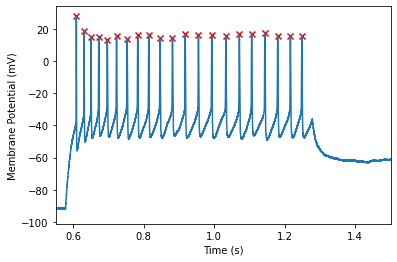

In [8]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.55, 1.5)

The [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) contains a number of useful functions for analysis. For example we can take the mean of a column

In [9]:
mean_trough = spikes['fast_trough_v'].mean()
print(f"Found a mean trough of {mean_trough}")

Found a mean trough of -44.91751480102539


In addition we can save the dataframe for opening later:

In [10]:
spikes.to_csv("out.csv") #Outputs the dataframe to a csv for opening in excel
#The "out.csv" specifies the file location/name

### Ensuring you captures the spikes

The above example uses the default spike finding options. This is suitable for many applications. However, one may find that this over/under detects spikes in your data. Take for example, the spikes found in one of the latter sweeps:

In [11]:
abf.setSweep(14)
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

(0.55, 1.5)

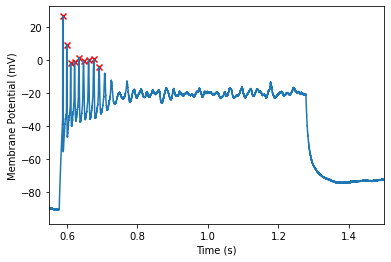

In [12]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.55, 1.5)

It still catches most of the spikes, however, it misses one or two spikes at the end of the train that you may want to pick up. To ensure we pick up these spikes, we can adjust a few parameters available to us. We can view the available options here:

In [13]:
help(spike_fe)

Help on SpikeFeatureExtractor in module ipfx.feature_extractor object:

class SpikeFeatureExtractor(builtins.object)
 |  SpikeFeatureExtractor(start=None, end=None, filter=10.0, dv_cutoff=20.0, max_interval=0.005, min_height=2.0, min_peak=-30.0, thresh_frac=0.05, reject_at_stim_start_interval=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, start=None, end=None, filter=10.0, dv_cutoff=20.0, max_interval=0.005, min_height=2.0, min_peak=-30.0, thresh_frac=0.05, reject_at_stim_start_interval=0)
 |      Initialize SweepFeatures object.-
 |      
 |      Parameters
 |      ----------
 |      t : ndarray of times (seconds)
 |      v : ndarray of voltages (mV)
 |      i : ndarray of currents (pA)
 |      start : start of time window for feature analysis (optional)
 |      end : end of time window for feature analysis (optional)
 |      filter : cutoff frequency for 4-pole low-pass Bessel filter in kHz (optional, default 10)
 |      dv_cutoff : minimum dV/dt to qualify as a spike in V

 First, we will take a look at the dv/dt threshold!

####  dv_cutoff: dV/dT threshold

The dV/dT threshold is the primary method by which ipfx detects spikes. Putative spikes must pass this check prior to any other settings being applied. By default, ipfx looks for points at which the dV/dT crosses 20mV/mS (V/s) (based on the ephys whitepaper noted above). if we examine the dV/dt of our trace, we can see that the smaller spikes do not reach this threshold

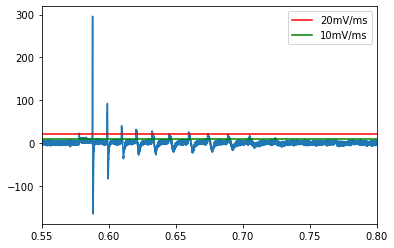

In [14]:
dV = np.diff(abf.sweepY) #take the difference of the adjacent points in mV
dT = np.diff(abf.sweepX * 1000) #take the difference of adjacent points in s * 1000 -> ms
dvdt = dV/dT #compute dvdt in mV/ms -> v/s
plt.plot(abf.sweepX[:-1], dvdt)
plt.xlim(0.55, 0.8)
plt.axhline(20, label='20mV/ms', c='r') #plot a horizontal line at 20mV/ms
plt.axhline(10, label='10mV/ms', c='g') #plot a horizontal line at 20mV/ms
plt.legend()

However, it appears that setting a threshold of 10mV/ms should do the trick! Now we will reinitialize the spike finder with the new threshold

In [15]:
spike_fe = SpikeFeatureExtractor(filter=0, dv_cutoff=10) #reintialize with a dv threshold of 10
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

(0.55, 1.5)

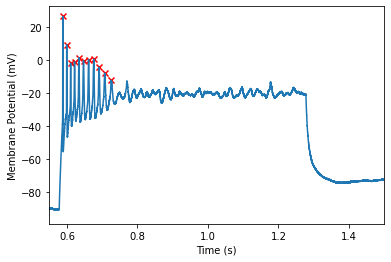

In [16]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.55, 1.5)

Its looking good! However, lets say we decided to exclude the final spike in the train, we can adjust some of the other parameters to do so. 

#### max_interval: Time between threshold and peak

Max interval defines the maximum length of time between the detected threshold and the detected peak. In many cases the default (5ms) should be fine. However, if you have slow or oddly shaped spikes, you may find adjusting this parameter useful. Take for example our threshold to peak time from our last sweep.

In [17]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
final_spike = spikes['peak_t'].to_numpy()[-1] #Gets the time of the last peak
final_threshold = spikes['threshold_t'].to_numpy()[-1] #gets the last threshgold
time = final_spike - final_threshold
print(f"Threshold to peak time of {time*1000}ms")

Threshold to peak time of 1.6499999999999293ms


(-30.0, 0.0)

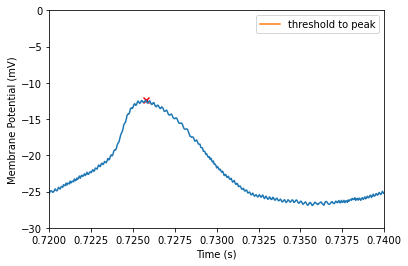

In [52]:
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.plot(np.linspace(final_threshold, final_spike, 10), np.full(10, -20), label="threshold to peak")
plt.xlabel("Time (s)")
plt.legend()
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.72, 0.74)
plt.ylim(-30, 0)

By specifying the threshold-to-peak time we can drop this spike

In [53]:
spike_fe = SpikeFeatureExtractor(filter=0, dv_cutoff=10, max_interval=0.00164) #Note that the units are in seconds
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.001640 s)
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
I

(0.55, 1.5)

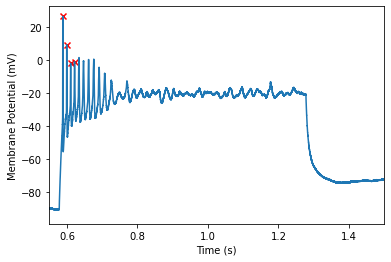

In [54]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.55, 1.5)

Note that while we dropped that final spike, we lost other spikes! To remedy this, we can try adjusting the minimum height instead!

#### min_height: the minimum height between threshold and peak

The min height parameter defines the cutoff for the minimum amount of voltage an action potential must swing upward. This is computed as the difference between the peak and threshold. Therefore we will want to enter an absolute (non-negative) value. AP's with a height below this value will be rejected. This value defaults of 2mV.

In [55]:
spike_fe = SpikeFeatureExtractor(filter=0, dv_cutoff=10, min_height=5) #reintialize with a min height of 5
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

(0.55, 1.5)

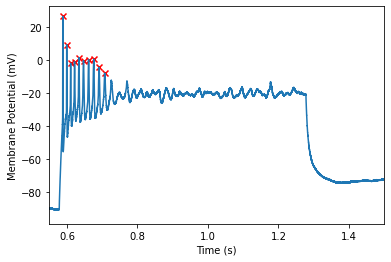

In [56]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.55, 1.5)

We can see that we have successfully excluded the last spike. If we examine closer we can examine the heights of the action potentials

In [57]:
spike_fe = SpikeFeatureExtractor(filter=0, dv_cutoff=10) #reintialize with a min height of 5
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

In [61]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
final_spike = spikes['peak_v'].to_numpy()[-1] #Gets the time of the last peak
final_threshold = spikes['threshold_v'].to_numpy()[-1] #gets the last threshgold
height = final_spike - final_threshold


(-30.0, 0.0)

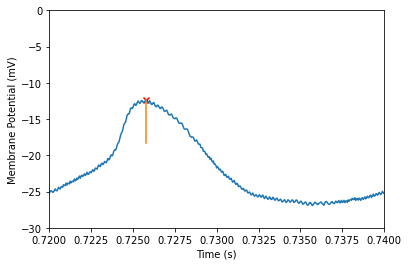

In [62]:
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.plot(np.full(10, spike_times.to_numpy()[-1]),np.linspace(final_threshold, final_spike, 10), label="threshold to peak")
plt.xlabel("Time (s)")
plt.legend
plt.ylabel(abf.sweepLabelY) #
plt.xlim(0.72, 0.74)
plt.ylim(-30, 0)

#### min_peak: the minimum absolute peak of the action potential

Similar to the setting above, we can set the cutoff for the min peak of the action potential. However, this value is not calculated in reference to the threshold, instead, it is computed as the minimum the peak must reach (regardless of distance between peak and threshold). Therefore, its okay to use negative numbers for this setting. Action potentials with peaks that do not reach this level will be rejected. This value defaults to -30

In [63]:
spike_fe = SpikeFeatureExtractor(filter=0, dv_cutoff=10, min_peak=-10) #reintialize with a min peak 10
spikes = spike_fe.process(abf.sweepX, abf.sweepY, abf.sweepC)

(0.55, 1.5)

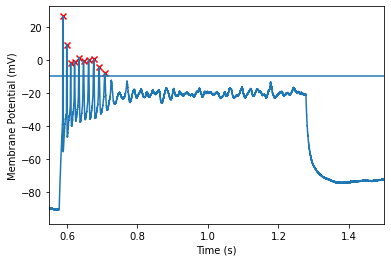

In [65]:
#isolate the columns for plotting
spike_times = spikes['peak_t'] #This isolates the peak_t columm
spike_peak = spikes['peak_v'] #this isolates the peak_v column
sweepX = abf.sweepX
sweepY = abf.sweepY
sweepC = abf.sweepC
#Create a figure
plt.figure(1)
plt.plot(sweepX, sweepY)
plt.scatter(spike_times, spike_peak, c='r', marker='x') #Plots X's at the peak of the action potential
plt.xlabel("Time (s)")
plt.axhline(-10, label="min_peak threshold of -10")
plt.ylabel(abf.sweepLabelY) 
plt.xlim(0.55, 1.5)

zooming a bit closer shows us that this threshold of -10 allows us to exclude the last spike but keep the others!

### Putting it all together: Find spikes across all sweeps

So far we have just been analyzing a single sweep of our ABF file. However functionally